# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# pprint(query_url)

limit = 0
lat = []
temp = []
humd = []
wind = []
cloud = []
city = []

# Make a request for each of the indices
for x in range(len(cities)):
    print(f"Making request number: {x} for ID: {cities[x]}")
    response = requests.get(query_url + cities[x]).json()

#    pprint(response)
    
    try:
        city.append(cities[x])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humd.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
    except:
        print("value error pass")
    time.sleep(1)
    limit += 1
    if limit == 5: break


Making request number: 0 for ID: khatanga
Making request number: 1 for ID: bambous virieux
Making request number: 2 for ID: new norfolk
Making request number: 3 for ID: rikitea
Making request number: 4 for ID: ranfurly


In [31]:
print(cloud)


[0, 40, 22, 60, 100, 0, 90, 20, 100]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
# Export the city data into a .csv

# create a data frame from cities, lat, and temp
weather_data = {
    "city": city,
    "lat": lat,
    "temp": temp,
    "humd": humd,
    "wind": wind,
    "cloud": cloud
}
weather_data = pd.DataFrame(weather_data)
weather_data.to_csv("Weather_Data.csv", index=False)
weather_data.head()

,city,lat,temp,humd,wind,cloud
0,khatanga,71.9667,-22.79,82,8.99,0
1,bambous virieux,-20.3428,84.20,70,11.50,40
2,new norfolk,-42.7826,53.55,57,1.99,23
3,rikitea,-23.1203,77.81,74,10.13,50
4,ranfurly,-45.1333,48.00,97,4.54,100


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
#  Get the indices of cities that have humidity over 100%.

humidityover = weather_data.loc[weather_data['humd'] > 100]
print(humidityover)


# index = weather_data.index
# humidityover = weather_data["humd"] > 100
# humdindices = index[humidityover] get only rows with > 100
# indices_list = humdindices.tolist()
# print(indices_list)


Empty DataFrame
Columns: [city, lat, temp, humd, wind, cloud]
Index: []


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

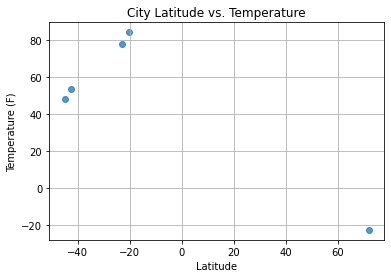

In [53]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["temp"], marker="o", alpha = 0.75)

# labels and ttile
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("latandtemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

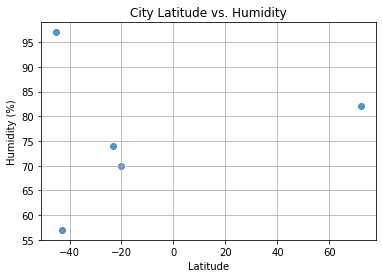

In [54]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["humd"], marker="o", alpha = 0.75)

# labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("latandhumd.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

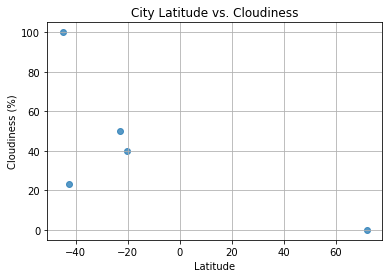

In [55]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["cloud"], marker="o", alpha = 0.75)

# labels and title
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("latandcloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

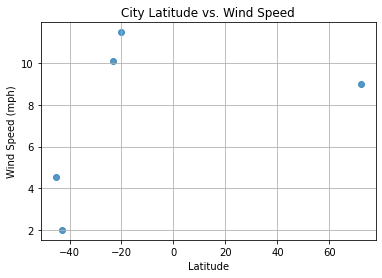

In [56]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["wind"], marker="o", alpha = 0.75)

# labels and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("latandwind.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression